In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
observation = 1000

xs = np.random.uniform(low=-10, high=10, size=(observation, 1))
zs = np.random.uniform(low=-10, high=10, size=(observation, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1,( observation, 1))

generated_targets = 2*xs - 3*zs +5 +noise

#data is taken into as tensor file format like numpy
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## solving the tensorflow

In [9]:
training_data = np.load('TF_intro.npz')

In [46]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                    kernel_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                    bias_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
])

#how the model will be laid down#stack layer
#dense takes the inputs and weights
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer = custom_optimizer,  loss='mean_squared_error' )

model.fit(training_data['inputs'], training_data['targets'] , epochs=100, verbose=2)


Epoch 1/100
1000/1000 - 0s - loss: 46.0211
Epoch 2/100
1000/1000 - 0s - loss: 1.1237
Epoch 3/100
1000/1000 - 0s - loss: 0.4291
Epoch 4/100
1000/1000 - 0s - loss: 0.3705
Epoch 5/100
1000/1000 - 0s - loss: 0.3953
Epoch 6/100
1000/1000 - 0s - loss: 0.4165
Epoch 7/100
1000/1000 - 0s - loss: 0.3853
Epoch 8/100
1000/1000 - 0s - loss: 0.4269
Epoch 9/100
1000/1000 - 0s - loss: 0.3793
Epoch 10/100
1000/1000 - 0s - loss: 0.3728
Epoch 11/100
1000/1000 - 0s - loss: 0.4052
Epoch 12/100
1000/1000 - 0s - loss: 0.3657
Epoch 13/100
1000/1000 - 0s - loss: 0.3786
Epoch 14/100
1000/1000 - 0s - loss: 0.3652
Epoch 15/100
1000/1000 - 0s - loss: 0.3761
Epoch 16/100
1000/1000 - 0s - loss: 0.3919
Epoch 17/100
1000/1000 - 0s - loss: 0.3650
Epoch 18/100
1000/1000 - 0s - loss: 0.3592
Epoch 19/100
1000/1000 - 0s - loss: 0.3781
Epoch 20/100
1000/1000 - 0s - loss: 0.3845
Epoch 21/100
1000/1000 - 0s - loss: 0.3837
Epoch 22/100
1000/1000 - 0s - loss: 0.3685
Epoch 23/100
1000/1000 - 0s - loss: 0.3865
Epoch 24/100
1000/1

## extract the weights and bias

In [37]:
model.layers[0].get_weights()

[array([[ 1.999775 ],
        [-3.0005624]], dtype=float32), array([4.974788], dtype=float32)]

In [38]:
weights = model.layers[0].get_weights()[0]

In [39]:
bias = model.layers[0].get_weights()[1]

In [40]:
weights

array([[ 1.999775 ],
       [-3.0005624]], dtype=float32)

In [41]:
bias

array([4.974788], dtype=float32)

## extract the outputs make preidction

In [42]:
model.predict_on_batch(training_data['inputs']).round(1)
#batch is the data we provided with
#calculates the output given inputs

array([[ -4.8],
       [-20.4],
       [ 24.2],
       [ -8.5],
       [ -6.8],
       [-27.3],
       [ 24.2],
       [  9.3],
       [ -1.1],
       [  6.8],
       [ 37.4],
       [ 33.6],
       [ 25.5],
       [ 11.8],
       [ 11.9],
       [-20.4],
       [ -5.2],
       [-21. ],
       [ 11.7],
       [ 33.6],
       [ 17.5],
       [  5.5],
       [ 11.5],
       [ 31.4],
       [-27.6],
       [ 20.8],
       [  6.7],
       [-21.7],
       [-15. ],
       [ 41.9],
       [  7.6],
       [  1.3],
       [ 26.6],
       [-26.4],
       [ -4.3],
       [ 13.9],
       [-17.8],
       [ -6.5],
       [  2.3],
       [-28.5],
       [-11.5],
       [ 35.1],
       [ 16.7],
       [ 31.3],
       [ -4.9],
       [ 12.4],
       [  0.9],
       [ 29.5],
       [-24.1],
       [ 30.6],
       [ 17.8],
       [ 21. ],
       [ 11.1],
       [ 31.8],
       [ -6.2],
       [-17. ],
       [-18.7],
       [  5.2],
       [ -4.9],
       [ 33.3],
       [-40.7],
       [ 16.8],
       [

In [43]:
training_data['targets'].round(1)
#compare

array([[ -5. ],
       [-21.3],
       [ 25.2],
       [ -7.8],
       [ -7.5],
       [-26.4],
       [ 24.6],
       [ 10. ],
       [ -0.2],
       [  6.9],
       [ 38.2],
       [ 32.9],
       [ 25.5],
       [ 11. ],
       [ 12.9],
       [-20.9],
       [ -6. ],
       [-21.2],
       [ 12.4],
       [ 34. ],
       [ 16.6],
       [  5.4],
       [ 12. ],
       [ 31. ],
       [-28.2],
       [ 21.4],
       [  7.3],
       [-21.4],
       [-15.1],
       [ 42.7],
       [  7.4],
       [  1.8],
       [ 25.7],
       [-25.5],
       [ -5. ],
       [ 13.1],
       [-17.8],
       [ -5.9],
       [  1.7],
       [-28.6],
       [-12.4],
       [ 36.1],
       [ 17. ],
       [ 30.6],
       [ -5.3],
       [ 12.9],
       [  1.6],
       [ 28.8],
       [-23.6],
       [ 31.1],
       [ 17.6],
       [ 20.3],
       [ 12.1],
       [ 32.5],
       [ -7. ],
       [-16.6],
       [-18.3],
       [  6. ],
       [ -4.9],
       [ 33.8],
       [-40. ],
       [ 17.4],
       [

## plotting the data

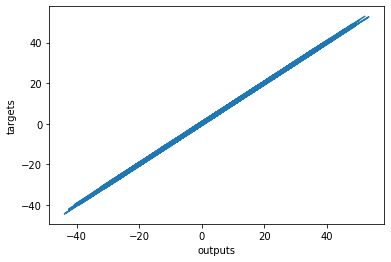

In [29]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()